# EDA on Vehicle Insurance Customer Data

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np

In [3]:
# Loading the data files

data_f1 = pd.read_csv("customer_details.csv")

data_f2 = pd.read_csv("customer_policy_details.csv")

1.Add the column names to both datasets:

i.Column Name for customer details table:
            
           customer_id, 

           Gender,

           age, 

           driving licence present,

           region code, 

           previously insured, 

           vehicle age 

           and vehicle damage, in respective order.
 

In [4]:
# Adding column names

column_names1 = ['Customer_Id','Gender','Age','Driving Licence Present','Region Code','Previously Insured','Vehicle Age','Vehicle Damage']

data_f1.columns=column_names1

data_f1.head()

,Customer_Id,Gender,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


ii.Column Name for customer_policy table:
              
           customer_id, 

           annual premium (in Rs), 

           sales channel code, 

           vintage and response.


In [5]:
column_names2 = ['Customer_Id','Annual Premium','Sales Channel Code','Vintage','Response']

data_f2.columns=column_names2

data_f2.head()

,Customer_Id,Annual Premium,Sales Channel Code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


2. Checking and Cleaning Data Quality: 

i.Null Values

a.Generate a summary of count of all the null values column wise

In [6]:
# Column wise count of null values of data_f1
data_f1.isnull().sum()

Customer_Id                386
Gender                     368
Age                        368
Driving Licence Present    393
Region Code                392
Previously Insured         381
Vehicle Age                381
Vehicle Damage             407
dtype: int64

  ### * Summary of the null values column wise

    Customer_Id has 386 null values out of 380723

    Gender has 368 null values out of 380741

    Age has 368 null values out of 380741

    Driving Licence Present has 393 null values out of 380716

    Region Code has 392 null values out of 380717

    Previously Insured has 381 null values out of 380728

    Vehicle Age has 381 null values out of 380728

    Vehicle Damage has 407 null values out of 380702

In [7]:
# column wise count of null values of data_f2
data_f2.isnull().sum()

Customer_Id           387
Annual Premium        346
Sales Channel Code    400
Vintage               388
Response              361
dtype: int64

### Summary of count of null values column wise
     Customer_Id has 387 null values out of 380722
     
     Annual Premium has 346 null values out 380763
     
     Sales Channel Code has 400 null values out 380709
     
     Vintage has 388 null values out 380721
     
     Response has 361 null values out of 380748

b.Drop Null values for customer_id because central         tendencies for id’s is not feasible.

In [8]:
# Dropping null values from customer_id on customer details table
data_f1.dropna(subset=['Customer_Id'],axis=0,inplace=True)

#resetting the index
data_f1.reset_index(drop=True,inplace=True)

In [9]:
# Dropping null values from Customer_Id on customer policy detalails
data_f2.dropna(subset=['Customer_Id'],axis=0,inplace=True)

#resetting the index
data_f2.reset_index(drop=True,inplace=True)

c.Replace all null values for numeric columns by mean. 

In [10]:
data_f1.head()

,Customer_Id,Gender,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In this table Age and Region Code are the numeric columns.
Driving Licence Present and Previously Insured are categorical data.

In [11]:
# Replacing the null values of Age by mean value

data_f1['Age'].fillna(data_f1['Age'].mean(),inplace=True)

# Replacing the null values of Region code by mean value

data_f1['Region Code'].fillna(data_f1['Region Code'].mean(),inplace=True)



In [12]:
data_f2.head()

,Customer_Id,Annual Premium,Sales Channel Code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In this Table Annual Premium,Sales Channel Code and Vintage are numerical data.
Response has categorical data.

In [13]:
# Replacing the null values of Annual Premium by its mean

data_f2['Annual Premium'].fillna(data_f2['Annual Premium'].mean(),inplace=True)

#Replacing the null values of Sales Channel Codeby its mean

data_f2['Sales Channel Code'].fillna(data_f2['Sales Channel Code'].mean(),inplace=True)

# Replacing the null values of Vintage by its mean

data_f2['Vintage'].fillna(data_f2['Vintage'].mean(),inplace=True)

d.Replace all null values for Categorical value by mode

In [14]:
# Replacing all null values of Driving Licence Present by mode

data_f1['Driving Licence Present'].fillna(data_f1['Driving Licence Present'].mode()[0],inplace=True)

# Replacing all null values of Previously Insured by mode

data_f1['Previously Insured'].fillna(data_f1['Previously Insured'].mode()[0],inplace=True)

In [15]:
# Replacing all null values of Response by mode

data_f2['Response'].fillna(data_f2['Response'].mode()[0],inplace=True)

ii.Outliers

a.Generate a summary of count of all the outliers column wise

In data_f1 table we need to calculate the outliers of Age and Region Code as the others are non-numeric columns.

<AxesSubplot:>

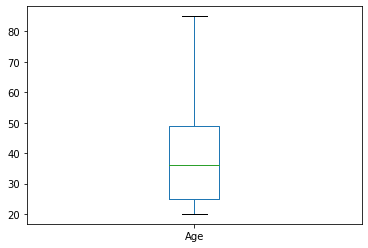

In [16]:
data_f1.boxplot(column=['Age'],grid=False)

<AxesSubplot:>

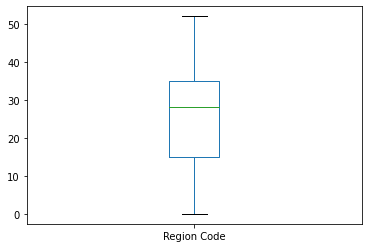

In [17]:
data_f1.boxplot(column=['Region Code'],grid=False)

From the above figures we can understand that the are no outliers for the customer details table.

In [18]:
# Finding outliers if present by IQR method
# for data_f1
def f_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    outlier = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return outlier

In [19]:
outlier1 = f_outliers(data_f1['Age'])
print('Number of outliers :',len(outlier1))
print('Maximum outlier value :',outlier1.max())
print('Minimum outlier value :',outlier1.min())

Number of outliers : 0
Maximum outlier value : nan
Minimum outlier value : nan


In [20]:
outlier2 = f_outliers(data_f1['Region Code'])
print('Number of outliers :',len(outlier2))
print('Maximum outlier value :',outlier2.max())
print('Minimum outlier value :',outlier2.min())

Number of outliers : 0
Maximum outlier value : nan
Minimum outlier value : nan


from the above result we can conclude that customer details table doesnt have outliers

<AxesSubplot:>

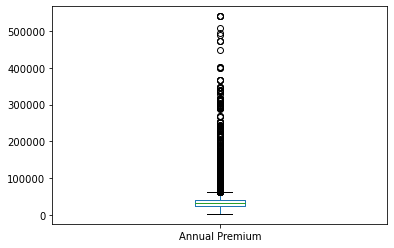

In [21]:
data_f2.boxplot(column='Annual Premium',grid=False)

<AxesSubplot:>

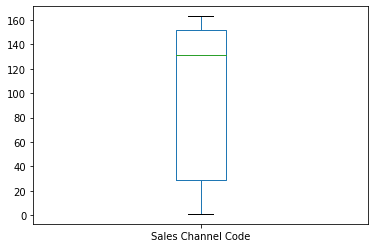

In [22]:
data_f2.boxplot(column='Sales Channel Code',grid=False)

<AxesSubplot:>

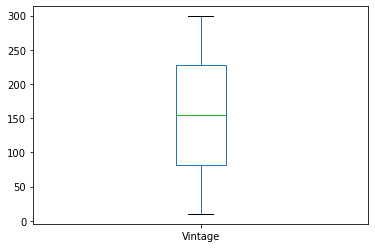

In [23]:
data_f2.boxplot(column='Vintage',grid=False)

from the graph we conclude that only Annual Premium column has outliers

In [24]:
outlier3 = f_outliers(data_f2["Annual Premium"])

print('Number of outliers :',len(outlier3))
print('Maximum outlier value :',outlier3.max())
print('Minimum outlier value :',outlier3.min())

Number of outliers : 10332
Maximum outlier value : 540165.0
Minimum outlier value : 61858.0


In [25]:
outlier4 = f_outliers(data_f2["Sales Channel Code"])

print('Number of outliers :',len(outlier4))
print('Maximum outlier value :',outlier4.max())
print('Minimum outlier value :',outlier4.min())

Number of outliers : 0
Maximum outlier value : nan
Minimum outlier value : nan


In [26]:
outlier5 = f_outliers(data_f2["Vintage"])

print('Number of outliers :',len(outlier5))
print('Maximum outlier value :',outlier5.max())
print('Minimum outlier value :',outlier5.min())

Number of outliers : 0
Maximum outlier value : nan
Minimum outlier value : nan


b.Replace all outlier values for numeric columns by mean.

In [27]:
def replace_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    upper = df[(df>(q3+1.5*iqr))].max()
    lower = df[(df<(q1-1.5*iqr))].min()
    df = np.where(df>upper,df.mean(),np.where(df<lower,df.mean(),df))
    return df

data_f2['Annual Premium'] = replace_outlier(data_f2['Annual Premium'])

iii. White spaces

In [33]:
# Remove white spaces

data_f1.apply(lambda x:x.str.strip() if x.dtype=='object' else x)

,Customer_Id,Gender,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


The customer policy details table contains of all float data type so removing white space is not required

iv. case correction(lower or upper, any one)

In [ ]:
# convert the characters into upper case

data_f1.apply(lambda x:x.str.upper() if x.dtype=='object' else x)

v. Convert nominal data (categorical) into dummies

In [34]:
# for future modeling use if required
dummy_gender = pd.get_dummies(data_f1["Gender"])
dummy_gender.head()


,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [35]:
dummy_vehicle_damage = pd.get_dummies(data_f1["Vehicle Damage"])
dummy_vehicle_damage.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [36]:
dummy_previously_insured = pd.get_dummies(data_f1["Previously Insured"])
dummy_previously_insured.head()

,0.0,1.0
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


vi.Drop Duplicates (duplicated rows) 

In [37]:
# Dropping duplicates from customer details data

data_f1.drop_duplicates(inplace=True)

In [39]:
# Dropping duplicates from customer details data

data_f2.drop_duplicates(inplace=True)

3.Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

In [40]:
master_table = pd.merge(data_f1,data_f2,on='Customer_Id')
master_table

,Customer_Id,Gender,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage,Annual Premium,Sales Channel Code,Vintage,Response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


4.Company needs some important information from the master table to make decisions for future growth.They needs following information:

i.Gender wise average annual premium

In [41]:
gender_wise = master_table.groupby('Gender')['Annual Premium'].mean()
gender_wise

Gender
Female    30492.028478
Male      30624.622150
Name: Annual Premium, dtype: float64

<AxesSubplot:title={'center':'.Gender wise average annual premium'}, xlabel='Gender'>

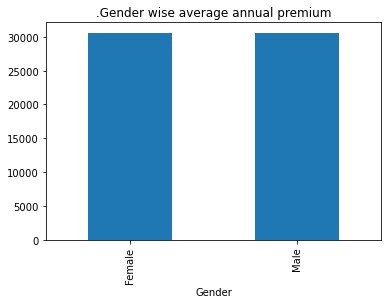

In [42]:
gender_wise.plot.bar(title='.Gender wise average annual premium')

ii. Age wise average annual premium

In [43]:
age_wise = master_table.groupby('Age')['Annual Premium'].mean()
age_wise

Age
20.0    26924.620173
21.0    30564.475810
22.0    30823.778102
23.0    30688.606298
24.0    31183.802890
            ...     
81.0    31201.571429
82.0    37705.379310
83.0    31012.727273
84.0    35440.818182
85.0    29792.363636
Name: Annual Premium, Length: 67, dtype: float64

<AxesSubplot:title={'center':'Age wise Average annual premium'}, xlabel='Age', ylabel='Annual Premium'>

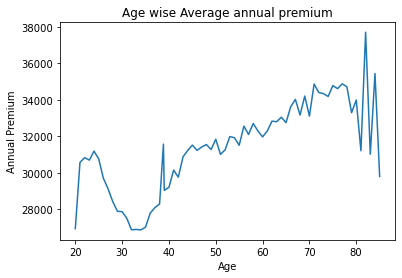

In [44]:
age_wise.plot(xlabel='Age',ylabel='Annual Premium',title='Age wise Average annual premium')

iii. Is your data balanced between the genders?

In [45]:
master_table.groupby('Gender').count()

,Customer_Id,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage,Annual Premium,Sales Channel Code,Vintage,Response
Gender,,,,,,,,,,,
Female,174485,174485,174485,174485,174485,174309,174300,174485,174485,174485,174485
Male,205484,205484,205484,205484,205484,205279,205266,205484,205484,205484,205484


The ratio between male and female is 1.177

The data between the genders are approximately same which means the data is balanced

iv. Vehicle age wise average annual premium.

In [46]:
vehicle_age_wise = master_table.groupby('Vehicle Age')['Annual Premium'].mean()
vehicle_age_wise

Vehicle Age
1-2 Year     30522.464972
< 1 Year     30115.716367
> 2 Years    35657.520845
Name: Annual Premium, dtype: float64

<AxesSubplot:title={'center':'Vehicle age wise Annual premium '}, xlabel='Vehicle Age'>

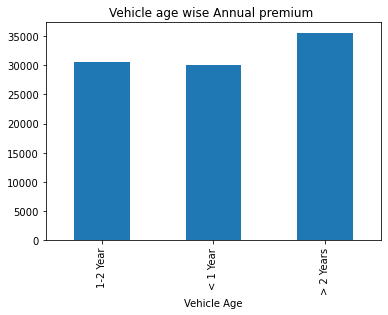

In [47]:
vehicle_age_wise.plot.bar(title='Vehicle age wise Annual premium ')

5. Is there any relation between Person Age and annual premium?

In [48]:
master_table['Age'].corr(master_table['Annual Premium'])

0.0677151598661391

In [49]:
master_table[['Age','Annual Premium']].corr()

,Age,Annual Premium
Age,1.000000,0.067715
Annual Premium,0.067715,1.000000


Since the Pearson Correlation lies between 0.5 and -0.5 we can say that there is no relation between Age and Annual Premium 